# Mínimos cuadrados

## Contenido

### 1. **Introducción a los Mínimos Cuadrados**

### 2. **Ajuste de Modelos Cuadráticos a Datos Experimentales**

### 3. **Ajustes Ponderados. Ajuste de Sumas de Funciones**

### 4. **Mas Ejemplos: Producto Interno, Regresión Lineal en Economía**


In [43]:
import numpy as np
import matplotlib.pyplot as plt

### 1. **Introducción a los Mínimos Cuadrados**

### 2. **Ajuste de Modelos Cuadráticos a Datos Experimentales**

#### Problema 1

Una pelota es arrojada hacia arriba. Una cámara de fotos toma fotos cada 0.1 segundos y a partir de esas fotos se calcula la altura de la pelota en cada instante.
En el archivo `altura_pelota.csv` se encuentran las mediciones obtenidas.

Sabiendo que la altura de la pelota depende del tiempo en forma cuadrática 
$h(t) = c_0 + c_1 t + c_2 t^2,$ estimar los valores de $c_0, c_1, c_2$ ajustando los datos por mínimos cuadrados.

Resolvemos el problema mediante las ecuaciones normales
$
A^tA c = A^ty
$
para una matriz $A$ apropiada.


**Ejercicios**

1. Obtener la matriz A.
2. Resolver por mínimos cuadrados utilizando la función de escalonamiento utilizada en el laboratorio de ALC (no utilizar el solve de numpy o scipy, etc.)
3. Graficar la nube de puntos y la función encontrada.
4. Es posible saber en que punto la pelota toca el suelo para los valores encontrados?

In [44]:
import pandas as pd   
# Los datos están en español! 
datos = pd.read_csv("altura_pelota.csv", sep=";", decimal=",")   # dataFrame
datos.head(3)

,tiempo,altura
0,0.0,13.335240
1,0.1,15.936852
2,0.2,23.846084


In [45]:
# Convertimos los datos a np.array
datosNP = datos.to_numpy()
print(datosNP.shape)

(101, 2)


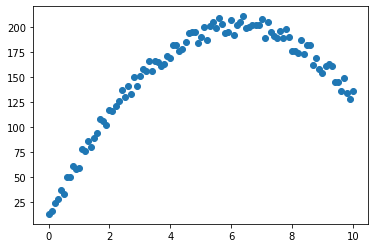

In [46]:
# Graficamos
plt.scatter(datosNP[:,0], datosNP[:,1])

In [47]:
A = np.ones((101,3))
for i in range(101):
       A[i][1] = datosNP[i][0]

In [48]:
for i in range(101):
     A[i][2]=datosNP[i][0]**2
A

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e-01, 1.000e-02],
       [1.000e+00, 2.000e-01, 4.000e-02],
       [1.000e+00, 3.000e-01, 9.000e-02],
       [1.000e+00, 4.000e-01, 1.600e-01],
       [1.000e+00, 5.000e-01, 2.500e-01],
       [1.000e+00, 6.000e-01, 3.600e-01],
       [1.000e+00, 7.000e-01, 4.900e-01],
       [1.000e+00, 8.000e-01, 6.400e-01],
       [1.000e+00, 9.000e-01, 8.100e-01],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.100e+00, 1.210e+00],
       [1.000e+00, 1.200e+00, 1.440e+00],
       [1.000e+00, 1.300e+00, 1.690e+00],
       [1.000e+00, 1.400e+00, 1.960e+00],
       [1.000e+00, 1.500e+00, 2.250e+00],
       [1.000e+00, 1.600e+00, 2.560e+00],
       [1.000e+00, 1.700e+00, 2.890e+00],
       [1.000e+00, 1.800e+00, 3.240e+00],
       [1.000e+00, 1.900e+00, 3.610e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 2.100e+00, 4.410e+00],
       [1.000e+00, 2.200e+00, 4.840e+00],
       [1.000e+00, 2.300e+00, 5.29

In [49]:
from numpy.linalg import inv
y = np.zeros(101)
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
for i in range(101):
      y[i] = datosNP[i][1]

In [51]:
A.T.shape

(3, 101)

In [52]:
A_AT = A.T@A
A_AT.shape

(3, 3)

In [53]:
inversa = inv(A_AT)

In [54]:
uno = A.T @ y

In [55]:
c = inversa@uno
c

array([10.44550189, 61.46602244, -4.9496809 ])

In [56]:
from numpy.polynomial import Polynomial

polinomio = np.polyfit(datosNP[:,0], datosNP[:,1], 2)

In [57]:
A

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e-01, 1.000e-02],
       [1.000e+00, 2.000e-01, 4.000e-02],
       [1.000e+00, 3.000e-01, 9.000e-02],
       [1.000e+00, 4.000e-01, 1.600e-01],
       [1.000e+00, 5.000e-01, 2.500e-01],
       [1.000e+00, 6.000e-01, 3.600e-01],
       [1.000e+00, 7.000e-01, 4.900e-01],
       [1.000e+00, 8.000e-01, 6.400e-01],
       [1.000e+00, 9.000e-01, 8.100e-01],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.100e+00, 1.210e+00],
       [1.000e+00, 1.200e+00, 1.440e+00],
       [1.000e+00, 1.300e+00, 1.690e+00],
       [1.000e+00, 1.400e+00, 1.960e+00],
       [1.000e+00, 1.500e+00, 2.250e+00],
       [1.000e+00, 1.600e+00, 2.560e+00],
       [1.000e+00, 1.700e+00, 2.890e+00],
       [1.000e+00, 1.800e+00, 3.240e+00],
       [1.000e+00, 1.900e+00, 3.610e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 2.100e+00, 4.410e+00],
       [1.000e+00, 2.200e+00, 4.840e+00],
       [1.000e+00, 2.300e+00, 5.29

In [61]:
polinomio

array([-4.9496809 , 61.46602244, 10.44550189])

<function matplotlib.pyplot.show(close=None, block=None)>

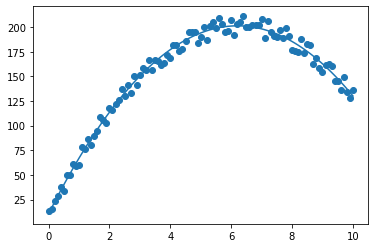

In [62]:
plt.plot(datosNP[:,0], A@c)
plt.scatter(datosNP[:,0], datosNP[:,1])
plt.show

Resolver a partir de aqui.

1. Definir A
2. Calcular A^T * A and A^T * y
3. Resolver el sistema de ecuaciones normales (Cholesky o LU)
4. Graficar la nube de puntos junto con la función encontrada.

### 3. **Ajustes Ponderados. Ajuste de Sumas de Funciones**

**Residuales**

$\sigma^2 \approx \frac{1}{N - M} \sum_{i=1}^N r_i^2$


In [20]:
N = len(datos) # m, en el apunte de Laplagne
sigma_ = np.sqrt(N)*np.mean(abs(y_fit - datos.altura.values))
print('Magnitud de la desviación estándar de la altura ajustada: {:.2f}'.format(sigma_))

NameError: name 'y_fit' is not defined

**Ajustes ponderados**

1. **Modelo de ajuste**:

Para ajustar los parámetros de un modelo lineal en función de un conjunto de datos con pesos, se utiliza la siguiente ecuación:

$$ y(x) = \sum_{j=0}^{M-1} a_j \, f_j(x) $$

donde $ f_j(x) $ son las funciones base evaluadas en $ x $ y $ a_j $ son los coeficientes a ajustar. La matriz de diseño $ A $ y el vector $ \beta $ se calculan como sigue:



2. **Definición de la matriz de diseño $ A $ y el vector $ \beta $**:

   Para cada punto de datos $ i $ y función base $ j $:

   $$ A_{ij} = \frac{f_j(x_i)}{\sigma_i^2} $$
   $$ \beta_j = \sum_{i=0}^{N-1} \frac{y_i \, f_j(x_i)}{\sigma_i^2} $$

3. **Ecuaciones normales**:

   Resolvemos el sistema de ecuaciones normales para obtener los coeficientes $ a $:

   $$ A^T A \, a = A^T y $$

4. **Bondad de ajuste ($ \chi^2 $)**:

   El valor de $ \chi^2 $ (suma de los residuales ponderados al cuadrado) es:

   $$ \chi^2 = \sum_{i=0}^{N-1} \left( \frac{y_i - \sum_{j=0}^{M-1} a_j \, f_j(x_i)}{\sigma_i} \right)^2 $$


In [21]:
import numpy as np

def fit_least_squares(x, y, sigma, basis_funcs):
    """
    Ajuste de mínimos cuadrados general con parámetros ajustables y ponderación de errores.

    Parámetros:
    x - Array de valores independientes.
    y - Array de valores dependientes (datos observados).
    sigma - Array de errores de cada punto de datos.
    basis_funcs - Función que toma x y devuelve un array con las funciones base evaluadas en x.

    Retorna:
    a - Coeficientes ajustados de las funciones base.
    chi2 - Valor de χ² para el ajuste (bondad de ajuste).
    """
    
    # Número de puntos de datos
    N = len(x)
    
    # Número de funciones base (número de parámetros a ajustar)
    ma = len(basis_funcs(x[0])) # 3, para un ajuste cuadratico

    # Construimos la matriz de diseño evaluando todas las funciones base en cada x
    A = np.array([basis_funcs(xi) for xi in x])  # Matriz N x ma

    # Creamos el vector de pesos (1/sigma^2)
    weights = 1.0 / sigma**2
    W = np.diag(weights)  # Matriz diagonal de pesos N x N

    # Calculamos AtA y AtY de forma vectorizada
    AtA = A.T @ W @ A  # Matriz ma x ma
    AtY = A.T @ (weights * y)  # Vector ma


    # Resolvemos el sistema AtA * a = AtY usando eliminación gaussiana o un solucionador de sistema lineal
    # print(AtA.round(2))
    a = np.linalg.solve(AtA, AtY)

    # Cálculo de χ² como bondad de ajuste
    model_y = A @ a  # Predicción de y usando el modelo ajustado
    chi2 = np.sum(((y - model_y) / sigma)**2)  # Suma de residuales al cuadrado, ponderada por sigma

    # # Cálculo iterando en los puntos
    # chi2 = 0.0
    # for i in range(N):
    #     funcs_eval = basis_funcs(x[i])
    #     model_y = np.dot(a, funcs_eval)
    #     chi2 += ((y[i] - model_y) / sigma[i])**2  # Suma de residuales al cuadrado, ponderada por sigma
    
    return a, chi2


In [22]:
# Ejemplo de funciones base para un ajuste cuadrático
def quadratic_basis(x):
    return np.array([1, x, x**2])

# Datos de ejemplo
x_data = datos.tiempo
y_data = datos.altura

N = len(datos); sigma_0 = sigma_
sigma_data = np.array(N*[sigma_])

# Llamada a la función de ajuste
a, chi2 = fit_least_squares(x_data, y_data, sigma_data, quadratic_basis)

print("Coeficientes ajustados:", a)
print("Valor de χ²:", chi2)


NameError: name 'sigma_' is not defined

#### **Mínimos cuadrados para sumas de funciones**

Para datos $(t_j, y_j)$, $1 \le j \le m$ queremos ajustar una función del tipo 
$$
y = c_1 f_1(t) + \dots + c_s f_s(t)
$$

Ejemplo: $y = a + b t + c t^2$.

RECORDAR: reemplazando los valores de $t$ e $y$ por los datos en la tabla obtenemos un sistema **lineal** de ecuaciones, donde las incógnitas son los $c_i$:

$$
\begin{align}
y_1 &= c_1 f_1(t_1) + \dots + c_s f_s(t_1) \\
&\vdots\\
y_m &= c_1 f_1(t_m) + \dots + c_s f_s(t_m)
\end{align}
$$

Cuando tenemos más datos (ecuaciones) que incógnitas, usamos mínimos cuadrados para obtener una solución aproximada.



#### Problema
Ajustar por mínimos cuadrados una función del tipo
$$
y = c_1 t^2 + c_2 e^t + c_3 t
$$
a los datos

|t|1|2|4|6|8|
| --- | --- | --- | --- | --- | --- |
|y|6|10|10|8|10|

In [23]:
# Vectores de datos
ti = np.array([1, 2, 4, 6, 8])
yi = np.array([6, 10, 10, 8, 10])

# a) Definimos las funciones
def f1(t):
    return(t**2)

def f2(t):
    return(np.e**t)

def f3(t):
    return(t)

**Ejercicios**
1. Construir la matriz A a partir de la ecuación de y
2. Econtrar por mínimos cuadrados los coeficientes $$c_1, c_2, c_3$$
3. Verificar gráficamente imprimiendo los puntos (t,y) y la función contínua obtenida por los mínimos cuadrados.


#### Para profundizar:

 - Estimacion de incertezas en ajuste por Bootstrap (/ Montecarlo)


### 4. **Mas Ejemplos: Producto Interno, Regresión Lineal en Economía**

#### Ajuste de funciones en espacios con producto interno.

- ¿Cómo definirías el producto interno entre dos funciones en un intervalo dado?

- ¿Por qué es útil el producto interno en el ajuste de funciones como sin(x) usando una combinación de funciones polinómicas?

- ¿Qué interpretas de los residuales al ajustar sin(x) con un polinomio de orden bajo en un intervalo específico?

In [24]:
import numpy as np
from scipy.integrate import quad

# Definimos el producto interno entre dos funciones en un intervalo dado
def producto_interno(f, g, a, b):
    integrand = lambda x: f(x) * g(x)
    result, _ = quad(integrand, a, b)  # Integración numérica en el intervalo [a, b]
    return result

# Opcion B:
# Definimos el producto interno entre dos funciones usando un promedio en puntos discretos en el intervalo
def producto_interno_discreto(f, g, a, b, num_puntos=1000):
    x_vals = np.linspace(a, b, num_puntos)  # Generamos puntos en el intervalo [a, b]
    productos = f(x_vals) * g(x_vals)       # Calculamos el producto de las dos funciones en cada punto
    promedio_producto = np.mean(productos)  # Promediamos el producto
    return promedio_producto * (b - a)      # Multiplicamos por la longitud del intervalo


## Podriamos reemplazar esta función con un producto interno con un valor medio del producto de las dos funciones, en un linspace con suficientes puntos?

# Definimos las funciones base
def g1(x):
    return x

def g2(x):
    return x**3

def g3(x):
    return x**5

# Definimos la función f(x) = sin(x) que queremos aproximar
def f(x):
    return np.sin(x)

# Limites del intervalo
a, b = -1, 1

# Creamos la matriz de diseño usando el producto interno
A = np.array([
    [producto_interno(g1, g1, a, b), producto_interno(g1, g2, a, b), producto_interno(g1, g3, a, b)],
    [producto_interno(g2, g1, a, b), producto_interno(g2, g2, a, b), producto_interno(g2, g3, a, b)],
    [producto_interno(g3, g1, a, b), producto_interno(g3, g2, a, b), producto_interno(g3, g3, a, b)]
])

# Creamos el vector de términos independientes
B = np.array([
    producto_interno(f, g1, a, b),
    producto_interno(f, g2, a, b),
    producto_interno(f, g3, a, b)
])

# Resolución del sistema de ecuaciones normales para obtener los coeficientes c1, c2, c3
coeficientes = np.linalg.solve(A, B)

# Imprimimos los coeficientes encontrados
print("Coeficientes: c1 =", coeficientes[0].round(5),
       ", c2 =", coeficientes[1].round(5), 
       ", c3 =", coeficientes[2].round(5))


Coeficientes: c1 = 0.99998 , c2 = -0.16652 , c3 = 0.00802


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


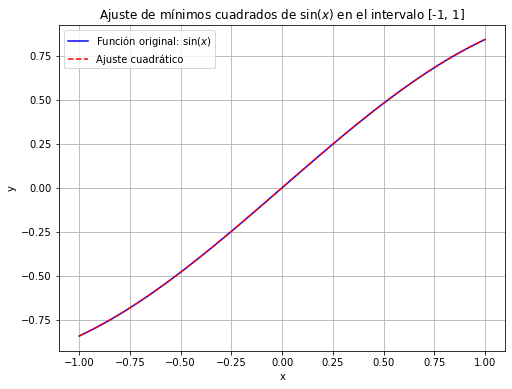

In [25]:
import matplotlib.pyplot as plt

# Definimos el polinomio ajustado usando los coeficientes obtenidos
def polinomio_aproximado(x):
    return coeficientes[0] * g1(x) + coeficientes[1] * g2(x) + coeficientes[2] * g3(x)

# Generamos valores de x en el intervalo [-1, 1] para graficar
x_vals = np.linspace(a, b, 100)
y_original = np.sin(x_vals)
y_ajuste = polinomio_aproximado(x_vals)

# Graficamos la función original y el ajuste
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_original, label="Función original: $\\sin(x)$", color="blue")
plt.plot(x_vals, y_ajuste, label="Ajuste cuadrático", color="red", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de mínimos cuadrados de $\\sin(x)$ en el intervalo [-1, 1]")
plt.legend()
plt.grid(True)
plt.show()


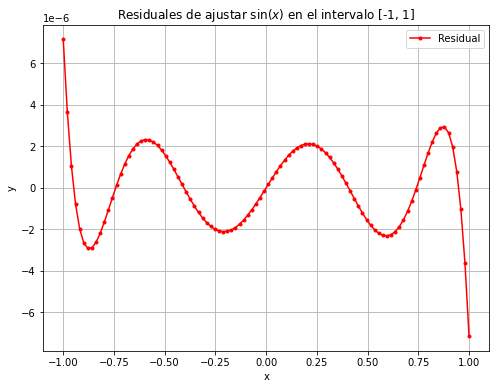

In [26]:

# Graficamos la función original y el ajuste
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_original - y_ajuste, label="Residual", marker = '.', color="red")
# plt.plot(x_vals, y_ajuste, label="Ajuste cuadrático", color="red", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Residuales de ajustar $\\sin(x)$ en el intervalo [-1, 1]")
plt.legend()
plt.grid(True)
plt.show()


#### 4. **Regresión Lineal en Economía**

- ¿Qué podemos concluir sobre la bondad de ajuste a partir de los valores de R2 y Adj. R2 en el resumen de la regresión?

- ¿Cómo interpretas el p-value de cada coeficiente en términos de su significancia estadística?

- ¿Cuáles podrían ser las consecuencias de la multicolinealidad entre los predictores?

- ¿Qué predictor parece tener la mayor influencia en el valor de la casa según el coeficiente estimado?

La regresion debajo esta hecha con un dataset (california housing) con sus datos sin procesar. Analizar los datos y la regresion.

#### Mejorar el Modelo:
   - **Mejorar el R-cuadrado**: Para explicar más la variabilidad, busca predictores que capturen aspectos adicionales del valor de la vivienda o hacer ingeniería de características (feature engineering) sobre las variables existentes.
   - **Eliminar Predictores No Relevantes**: `Population` podría ser reconsiderada ya que tiene un valor p alto, lo que indica que puede no aportar mucho al modelo.
   - **Abordar la Multicolinealidad**: Reducir la multicolinealidad eliminando o combinando variables altamente correlacionadas, o aplicar técnicas de regularización.
   - **Normalidad de los Residuales**: Considerar transformar las variables o utilizar una especificación de modelo diferente si la normalidad de los residuales es crucial para análisis adicionales.


In [27]:
pip install statsmodels scikit-learn pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing

# California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display head
display(df.head())

# Definir variables dependientes e independientes
# Target variable: Median House Value
# Predictors: Average Income, Average House Age, and more

X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

# Add a constant term to the predictor variables (intercept)
X = sm.add_constant(X)

# Fit the regression model using Ordinary Least Squares (OLS)
model = sm.OLS(y, X)
results = model.fit()

# Display the summary table of regression results
print(results.summary())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:16:08   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0


**Calidad del Ajuste (R-cuadrado y R-cuadrado Ajustado)**
   - **R-cuadrado**: 0.606. Esto significa que aproximadamente el 60.6% de la variabilidad en la variable dependiente (`MedHouseVal`) es explicada por las variables independientes en el modelo. Un 60.6% representa un ajuste moderado, hay espacio para mejorar en su poder predictivo.

**Significancia Estadística de los Predictores**
   - La mayoría de los predictores tienen un valor **P>|t|** de 0.000, lo que indica que son estadísticamente significativos a niveles de confianza típicos (por ejemplo, 95%).
   - **Population** es el único predictor con un valor p elevado (0.402), lo que sugiere que no es estadísticamente significativo para predecir `MedHouseVal`. Esto podría indicar que `Population` podría excluirse del modelo para simplificarlo sin perder poder predictivo. O bien, considerar una transformacion de la variable.

**Coeficientes e Interpretaciones**
   - El modelo incluye una variedad de predictores, y los **coeficientes** muestran el cambio esperado en `MedHouseVal` por un cambio unitario en cada predictor, manteniendo constantes las demás variables.
   - **MedInc (Ingreso Medio)** tiene un coeficiente positivo (0.4367), lo que significa que un mayor ingreso está asociado con valores de vivienda más altos. Esto tiene sentido intuitivo.
   - **HouseAge** y **Latitude** también tienen coeficientes positivos, sugiriendo una relación directa con `MedHouseVal`.
   - **AveRooms** tiene un coeficiente negativo (-0.1073), lo cual puede parecer contradictorio inicialmente, pero podría estar capturando una relación más compleja donde las casas con menos habitaciones tienen un valor más alto debido a factores que no están incluidos en el modelo.
   - **Longitude** y **AveOccup** también tienen efectos negativos significativos en `MedHouseVal`.

**Multicolinealidad (Número de Condición)**
   - El **número de condición** es muy alto (2.38e+05), lo que indica posibles problemas de multicolinealidad. Esto sugiere que algunos de los predictores pueden estar altamente correlacionados entre sí, lo cual puede hacer que las estimaciones de los coeficientes sean poco fiables. Un número de condición elevado puede indicar que el modelo podría beneficiarse eliminando o combinando variables correlacionadas.

**Estadísticas de Bondad de Ajuste**
   - **F-estadístico** y **Prob (F-estadístico)**: El F-estadístico (3970) y su valor p asociado de 0.000 indican que el modelo general es estadísticamente significativo, es decir, al menos uno de los predictores está significativamente relacionado con `MedHouseVal`.
   - **AIC y BIC**: Tanto el AIC (4.527e+04) como el BIC (4.534e+04) son medidas de bondad de ajuste que penalizan por el número de predictores. Valores más bajos generalmente indican un mejor ajuste. Estas métricas pueden ser útiles para comparar el modelo con otras alternativas.

**Diagnóstico de los Residuales**
   - **Omnibus, Prob(Omnibus), Skew, Kurtosis**: Estos valores indican posibles problemas con los residuales. Idealmente, los residuales deberían distribuirse normalmente. Los valores p significativos (0.000 para Omnibus y Jarque-Bera) y los valores de sesgo (skew) y curtosis distintos de cero sugieren que los residuales no son perfectamente normales, lo cual podría afectar la validez de las pruebas estadísticas en los coeficientes.
   - **Durbin-Watson**: El estadístico de Durbin-Watson es 0.885, menor que 2, lo que indica algo de autocorrelación positiva en los residuales. Esto es importante, especialmente si los datos tienen una estructura temporal o espacial.


MedInc


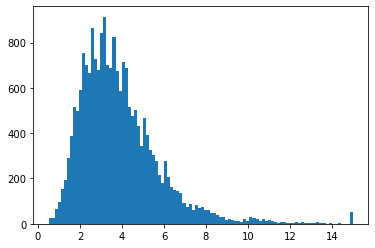

HouseAge


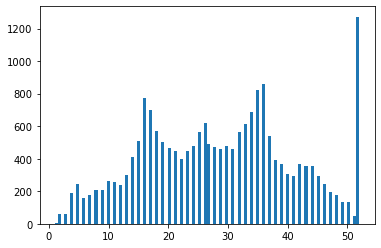

AveRooms


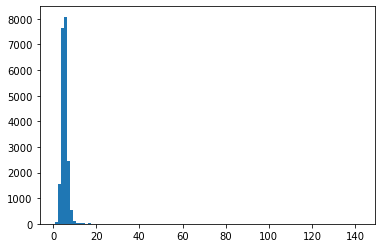

AveBedrms


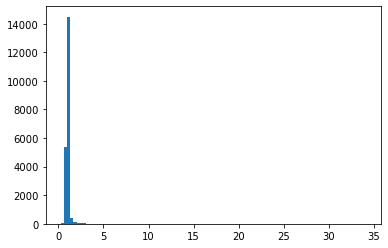

Population


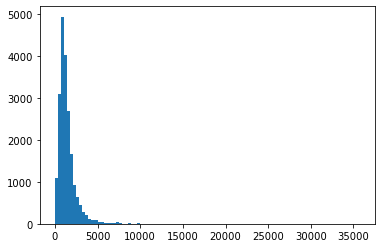

AveOccup


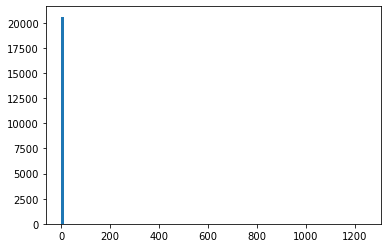

Latitude


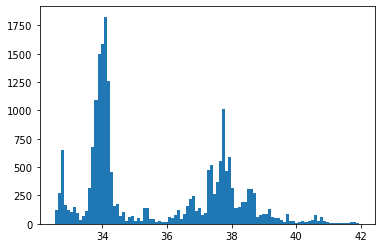

Longitude


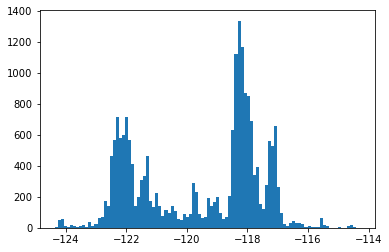

MedHouseVal


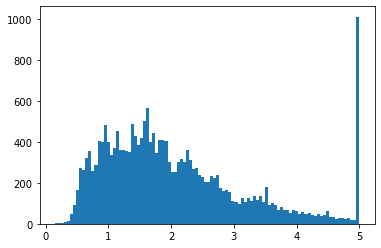

In [29]:
for col in df.columns:
       print(col)
       plt.hist(df[col], bins = 100)
       plt.show()


In [30]:
df=df.drop(columns="Population")

In [31]:
import geopandas as gpd

In [34]:
#gdf = gpd.from_dataframe(df, )

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

<AxesSubplot:>

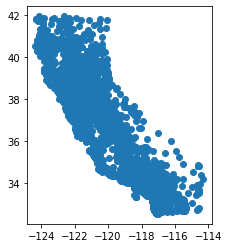

In [36]:
gdf.plot()

In [ ]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', "Latitude", "Longitude", "" ]]
y = df['MedHouseVal']

# Add a constant term to the predictor variables (intercept)
X = sm.add_constant(X)

# Fit the regression model using Ordinary Least Squares (OLS)
model = sm.OLS(y, X)
results = model.fit()

# Display the summary table of regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     5995.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:08:35   Log-Likelihood:                -24284.
No. Observations:               20640   AIC:                         4.858e+04
Df Residuals:                   20635   BIC:                         4.862e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3958      0.025    -16.012      0.0